In [1]:
#@title Package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm , t
from scipy.stats import ttest_ind
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title Hyperparameters

GROUP_CLASS = 0
VIDEO = 1
PRIVATE_CLASS = 2
POWERPOINT = 3
GROUP_CLASS__VIDEO = 4
GROUP_CLASS__PRIVATE_CLASS = 5
GROUP_CLASS__POWERPOINT = 6
VIDEO__PRIVATECLASS = 7
VIDEO__POWERPOINT = 8
PRIVATECLASS__POWERPOINT = 9
GROUP_CLASS_BUDGET = 60
PRIVATE_CLASS_BUDGET = 120
VIDEO_BUDGET = 40
POWERPOINT_BUDGET = 20
EPSILON = 1
BASELINE = 7

In [3]:
#@title Plot Results
def plot_results(agent_scores,window_size,figure,ax,label,ylabel):

  n_rep, n_episode = np.array(agent_scores).shape
  smoothed_agent_scores = []
  for i in range(n_rep):
    smoothed_agent_scores.append(pd.Series(agent_scores[i]).rolling(window_size , min_periods = 0).mean())

  x_bar = np.mean(np.array(smoothed_agent_scores), axis=0) 
  sigma = np.std(np.array(smoothed_agent_scores), axis=0) 
  SE = sigma / np.sqrt(n_rep)
  interval =  1 - 0.05
  if n_rep < 30:
      t_statistic = t.interval(interval, df = n_rep - 1)[1]
      ME = t_statistic * SE
  else:
      z_statistic = norm.interval(interval)[1]
      ME = z_statistic * SE        

  ax.plot(range(0,n_episode), x_bar , label = label)
  if n_rep >= 2:
      ax.fill_between(range(0,n_episode), (x_bar - ME), (x_bar + ME), alpha=0.05)
  ax.set_xlabel("Episodes", fontsize=13)
  ax.set_ylabel(ylabel, fontsize=13)
  ax.legend()

In [4]:
#@title Environment
class Environment():
    def __init__(self, learner, reward):
        self.learner = learner
        self.reward = reward
        
    def calc_reward(self,action):
        self.reward = self.learner.get_reward(action)
        return self.reward

    def get_budget(self):
        return self.learner.budget

In [5]:
#@title Action
class Action():
    def __init__(self, name):
        self.name = name
        self.mean = 0
        self.No = 0
        self.Upper_Confidence_Bound=0
        self.preference = 0
        self.Available = 0
    def reset_value(self):
        self.mean = 0
        self.No = 0
        self.Upper_Confidence_Bound = 0
        self.preference = 0
        self.Available = 0

## Learners

In [6]:
#@title primary school student
class primary_school_student():
  def __init__(self,preference,budget):
    self.preference = preference
    self.budget = budget

  def get_reward(self, action):
    p1 = np.random.uniform(0.9,1)
    p2 = np.random.uniform(0.9,1)

    if action == GROUP_CLASS:
        reward = self.preference[0] * np.random.normal(11,1) + self.preference[1] * ((self.budget - GROUP_CLASS_BUDGET)/self.budget)

    elif action == VIDEO:
        reward = self.preference[0] * np.random.normal(3,1) + self.preference[1] * ((self.budget - VIDEO_BUDGET)/self.budget)

    elif action == PRIVATE_CLASS:
        reward = self.preference[0] * np.random.normal(10,1) + self.preference[1] * ((self.budget - PRIVATE_CLASS_BUDGET)/self.budget)

    elif action == POWERPOINT:
        reward = self.preference[0] * np.random.normal(1,1) + self.preference[1] * ((self.budget - POWERPOINT_BUDGET)/self.budget)

    elif action == GROUP_CLASS__VIDEO:
        reward = self.preference[0] * (p1 * np.random.normal(11,1) + p2 * np.random.normal(3,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET + VIDEO_BUDGET))/self.budget)
    
    elif action == GROUP_CLASS__PRIVATE_CLASS:
        reward = self.preference[0] * (p1 * np.random.normal(11,1) + p2 * np.random.normal(10,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    
    elif action == GROUP_CLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(11,1) + p2 * np.random.normal(1,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    
    elif action == VIDEO__PRIVATECLASS:
        reward = self.preference[0] * (p1 * np.random.normal(3,1) + p2 * np.random.normal(10,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    
    elif action == VIDEO__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(3,1) + p2 * np.random.normal(10,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    
    elif action == PRIVATECLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(10,1) + p2 * np.random.normal(1,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    return reward

In [7]:
#@title high school student
class high_school_student():
  def __init__(self,preference,budget):
    self.preference = preference
    self.budget = budget

  def get_reward(self, action):
    p1 = np.random.uniform(0.5,1)
    p2 = np.random.uniform(0.5,1)

    if action == GROUP_CLASS:
        reward = self.preference[0] * np.random.normal(9,1) + self.preference[1] * ((self.budget - GROUP_CLASS_BUDGET)/self.budget)
    elif action == VIDEO:
        reward = self.preference[0] * np.random.normal(6,1) + self.preference[1] * ((self.budget - VIDEO_BUDGET)/self.budget)
    elif action == PRIVATE_CLASS:
        reward = self.preference[0] * np.random.normal(11,1) + self.preference[1] * ((self.budget - PRIVATE_CLASS_BUDGET)/self.budget)
    elif action == POWERPOINT:
        reward = self.preference[0] * np.random.normal(4,1) + self.preference[1] * ((self.budget - POWERPOINT_BUDGET)/self.budget)
    elif action == GROUP_CLASS__VIDEO:
        reward = self.preference[0] * (p1 * np.random.normal(9,1) + p2 * np.random.normal(6,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET + VIDEO_BUDGET))/self.budget)
    elif action == GROUP_CLASS__PRIVATE_CLASS:
        reward = self.preference[0] * (p1 * np.random.normal(9,1) + p2 * np.random.normal(11,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == GROUP_CLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(9,1) + p2 * np.random.normal(4,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    elif action == VIDEO__PRIVATECLASS:
        reward = self.preference[0] * (p1 * np.random.normal(6,1) + p2 * np.random.normal(11,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == VIDEO__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(6,1) + p2 * np.random.normal(11,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == PRIVATECLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(11,1) + p2 * np.random.normal(4,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    return reward

In [8]:
#@title university student
class university_student():
  def __init__(self,preference,budget):
    self.preference = preference
    self.budget = budget

  def get_reward(self, action):
    p1 = np.random.uniform(0.5,1)
    p2 = np.random.uniform(0.5,1)

    if action == GROUP_CLASS:
        reward = self.preference[0] * np.random.normal(8,1) + self.preference[1] * ((self.budget - GROUP_CLASS_BUDGET)/self.budget)
    elif action == VIDEO:
        reward = self.preference[0] * np.random.normal(8.5,1) + self.preference[1] * ((self.budget - VIDEO_BUDGET)/self.budget)
    elif action == PRIVATE_CLASS:
        reward = self.preference[0] * np.random.normal(7,1) + self.preference[1] * ((self.budget - PRIVATE_CLASS_BUDGET)/self.budget)
    elif action == POWERPOINT:
        reward = self.preference[0] * np.random.normal(6.5,1) + self.preference[1] * ((self.budget - POWERPOINT_BUDGET)/self.budget)
    elif action == GROUP_CLASS__VIDEO:
        reward = self.preference[0] * (p1 * np.random.normal(8,1) + p2 * np.random.normal(8.5,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET + VIDEO_BUDGET))/self.budget)
    elif action == GROUP_CLASS__PRIVATE_CLASS:
        reward = self.preference[0] * (p1 * np.random.normal(8,1) + p2 * np.random.normal(7,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == GROUP_CLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(8,1) + p2 * np.random.normal(6.5,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    elif action == VIDEO__PRIVATECLASS:
        reward = self.preference[0] * (p1 * np.random.normal(8.5,1) + p2 * np.random.normal(7,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == VIDEO__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(8.5,1) + p2 * np.random.normal(6.5,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == PRIVATECLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(7,1) + p2 * np.random.normal(6.5,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    return reward

In [9]:
#@title middle_age_learner
class middle_age_learner():
  def __init__(self,preference,budget):
    self.preference = preference
    self.budget = budget

  def get_reward(self, action):
    p1 = np.random.uniform(0.5,1)
    p2 = np.random.uniform(0.5,1)

    if action == GROUP_CLASS:
        reward = self.preference[0] * np.random.normal(7,1) + self.preference[1] * ((self.budget - GROUP_CLASS_BUDGET)/self.budget)
    elif action == VIDEO:
        reward = self.preference[0] * np.random.normal(8,1) + self.preference[1] * ((self.budget - VIDEO_BUDGET)/self.budget)
    elif action == PRIVATE_CLASS:
        reward = self.preference[0] * np.random.normal(9,1) + self.preference[1] * ((self.budget - PRIVATE_CLASS_BUDGET)/self.budget)
    elif action == POWERPOINT:
        reward = self.preference[0] * np.random.normal(7,1) + self.preference[1] * ((self.budget - POWERPOINT_BUDGET)/self.budget)
    elif action == GROUP_CLASS__VIDEO:
        reward = self.preference[0] * (p1 * np.random.normal(7,1) + p2 * np.random.normal(8,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET + VIDEO_BUDGET))/self.budget)
    elif action == GROUP_CLASS__PRIVATE_CLASS:
        reward = self.preference[0] * (p1 * np.random.normal(7,1) + p2 * np.random.normal(9,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == GROUP_CLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(7,1) + p2 * np.random.normal(7,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    elif action == VIDEO__PRIVATECLASS:
        reward = self.preference[0] * (p1 * np.random.normal(8,1) + p2 * np.random.normal(9,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == VIDEO__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(8,1) + p2 * np.random.normal(7,1)) + self.preference[1] * ((self.budget - (VIDEO_BUDGET+PRIVATE_CLASS_BUDGET))/self.budget)
    elif action == PRIVATECLASS__POWERPOINT:
        reward = self.preference[0] * (p1 * np.random.normal(9,1) + p2 * np.random.normal(7,1)) + self.preference[1] * ((self.budget - (GROUP_CLASS_BUDGET+POWERPOINT_BUDGET))/self.budget)
    return reward

## Agents

In [10]:
#@title Epsilon-greedy Agent

class e_greedy_agent():
    def __init__(self,env=None,baseline = BASELINE, alpha=0, beta=1, gamma=1 , epsilon = EPSILON):
        self.env = env
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.epsilon = epsilon
        self.baseline = baseline
    
    def calculate_utility(self, reward):
        utility = self.beta * (reward) ** self.gamma + self.alpha
        return utility
    
    def choose_value(self,Actions):
        i = 0
        idx = []
        for a in range(10):
          if(self.Available_actions(Actions,a) == 1):
            idx.append(i)
          i += 1
        
        p = np.random.random()
        if p < self.epsilon:
            j = random.choice(idx)
            return j
        else:
            Actions_idx = [Actions[i] for i in idx]
            j = np.argmax([a.mean for a in Actions_idx])
            return idx[j]
    def update_value(self,action,utility):
        action.No += 1
        action.mean = (1 - 1.0 / action.No)*action.mean + 1.0 / action.No * utility

    def Available_actions(self,Actions,action):
      if(self.costs(action) > self.env.get_budget()):
        Actions[action].Available = 0
        return 0
      else:
        Actions[action].Available = 1
        return 1

    def costs(self,action):
      if(action == GROUP_CLASS):
        return GROUP_CLASS_BUDGET
      if(action == VIDEO):
        return VIDEO_BUDGET
      if(action == PRIVATE_CLASS):
        return PRIVATE_CLASS_BUDGET  
      if(action == POWERPOINT):
        return POWERPOINT_BUDGET
      if(action == GROUP_CLASS__VIDEO):
        return GROUP_CLASS_BUDGET + VIDEO_BUDGET
      if(action == GROUP_CLASS__PRIVATE_CLASS):
        return GROUP_CLASS_BUDGET + PRIVATE_CLASS_BUDGET
      if(action == GROUP_CLASS__POWERPOINT):
        return GROUP_CLASS_BUDGET + POWERPOINT_BUDGET
      if(action == VIDEO__PRIVATECLASS):
        return VIDEO_BUDGET + PRIVATE_CLASS_BUDGET
      if(action == VIDEO__POWERPOINT):
        return GROUP_CLASS_BUDGET + POWERPOINT_BUDGET
      if(action == PRIVATECLASS__POWERPOINT):
        return GROUP_CLASS_BUDGET + POWERPOINT_BUDGET

    def train(self,Actions,Repeats,Episodes):
      reward_eg = np.zeros((Episodes,))
      rewards_eg = np.zeros((Repeats,Episodes))
      action_eg = np.zeros((Episodes,))
      actions_eg = np.zeros((Repeats,Episodes))

      for r in range(Repeats):
          for i in range(10):
              (Actions)[i].reset_value()
          for e in range (Episodes):
              optimal_action = self.choose_value(Actions)
              action_eg[e] = optimal_action
              utility = self.calculate_utility(self.env.calc_reward(optimal_action)) + self.baseline
              reward_eg[e] = utility 
              self.update_value(Actions[optimal_action],utility)
              self.epsilon = np.exp(-0.05*e)
          rewards_eg[r,:] = reward_eg
          actions_eg[r,:] = action_eg

      return rewards_eg,actions_eg

## Results

### Primary School Student

In [11]:
Actions = [Action(GROUP_CLASS),Action(VIDEO),Action(PRIVATE_CLASS),Action(POWERPOINT),Action(GROUP_CLASS__VIDEO),Action(GROUP_CLASS__PRIVATE_CLASS),Action(GROUP_CLASS__POWERPOINT),Action(VIDEO__PRIVATECLASS),Action(VIDEO__POWERPOINT),Action(PRIVATECLASS__POWERPOINT)]
student = primary_school_student(np.array([1,0]),200)
env = Environment(student,0)
agent_eg = e_greedy_agent(env)
rewards_eg,actions_eg = agent_eg.train(Actions,20,1000)

Text(0.5, 1.0, 'primary school student')

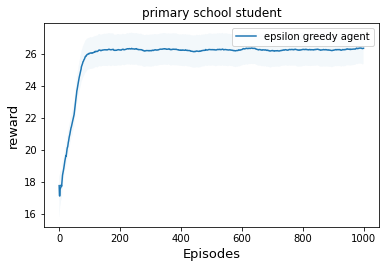

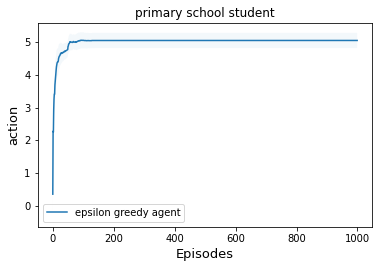

In [12]:
fig, ax = plt.subplots(figsize = (6, 3.75))
plot_results(rewards_eg,50,fig,ax,'epsilon greedy agent','reward')
plt.title('primary school student')
fig1, ax1 = plt.subplots(figsize = (6, 3.75))
plot_results(actions_eg,50,fig1,ax1,'epsilon greedy agent','action')
plt.title('primary school student')

In [17]:
Actions = [Action(GROUP_CLASS),Action(VIDEO),Action(PRIVATE_CLASS),Action(POWERPOINT),Action(GROUP_CLASS__VIDEO),Action(GROUP_CLASS__PRIVATE_CLASS),Action(GROUP_CLASS__POWERPOINT),Action(VIDEO__PRIVATECLASS),Action(VIDEO__POWERPOINT),Action(PRIVATECLASS__POWERPOINT)]
student = primary_school_student(np.array([0.05,0.95]),150)
env = Environment(student,0)
agent_eg = e_greedy_agent(env)
rewards_eg,actions_eg = agent_eg.train(Actions,20,1000)

Text(0.5, 1.0, 'primary school student')

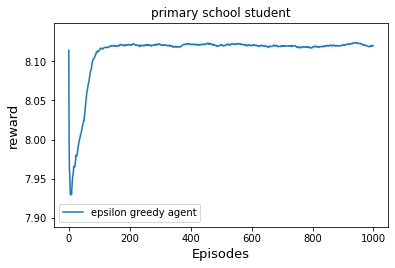

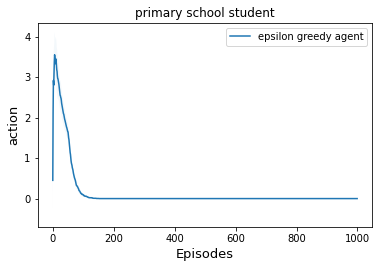

In [18]:
fig, ax = plt.subplots(figsize = (6, 3.75))
plot_results(rewards_eg,50,fig,ax,'epsilon greedy agent','reward')
plt.title('primary school student')
fig1, ax1 = plt.subplots(figsize = (6, 3.75))
plot_results(actions_eg,50,fig1,ax1,'epsilon greedy agent','action')
plt.title('primary school student')

### High School Student

In [ ]:
Actions = [Action(GROUP_CLASS),Action(VIDEO),Action(PRIVATE_CLASS),Action(POWERPOINT),Action(GROUP_CLASS__VIDEO),Action(GROUP_CLASS__PRIVATE_CLASS),Action(GROUP_CLASS__POWERPOINT),Action(VIDEO__PRIVATECLASS),Action(VIDEO__POWERPOINT),Action(PRIVATECLASS__POWERPOINT)]
student = high_school_student(np.array([0.6,0.4]),200)
env = Environment(student,0)
agent_eg = e_greedy_agent(env)
rewards_eg,actions_eg = agent_eg.train(Actions,20,1000)

Text(0.5, 1.0, 'primary school student')

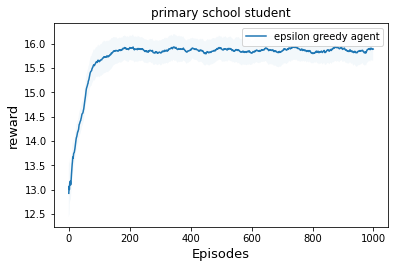

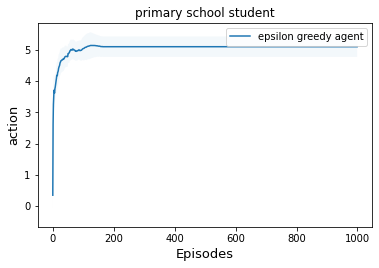

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3.75))
plot_results(rewards_eg,50,fig,ax,'epsilon greedy agent','reward')
plt.title('high school student')
fig1, ax1 = plt.subplots(figsize = (6, 3.75))
plot_results(actions_eg,50,fig1,ax1,'epsilon greedy agent','action')
plt.title('high school student')

### University Student

In [ ]:
Actions = [Action(GROUP_CLASS),Action(VIDEO),Action(PRIVATE_CLASS),Action(POWERPOINT),Action(GROUP_CLASS__VIDEO),Action(GROUP_CLASS__PRIVATE_CLASS),Action(GROUP_CLASS__POWERPOINT),Action(VIDEO__PRIVATECLASS),Action(VIDEO__POWERPOINT),Action(PRIVATECLASS__POWERPOINT)]
student = university_student(np.array([0.5,0.5]),80)
env = Environment(student,0)
agent_eg = e_greedy_agent(env)
rewards_eg,actions_eg = agent_eg.train(Actions,20,1000)

Text(0.5, 1.0, 'primary school student')

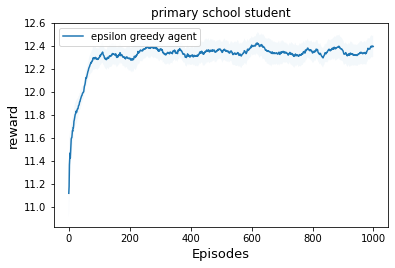

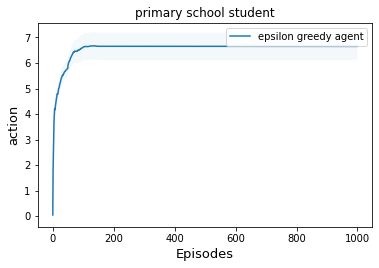

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3.75))
plot_results(rewards_eg,50,fig,ax,'epsilon greedy agent','reward')
plt.title('primary school student')
fig1, ax1 = plt.subplots(figsize = (6, 3.75))
plot_results(actions_eg,50,fig1,ax1,'epsilon greedy agent','action')
plt.title('primary school student')